# Información sobre Internaciones en la Ciudad de Buenos Aires.
**Información publicada en https://data.buenosaires.gob.ar/dataset/movimiento-hospitalario

Esta información nos permite saber los servicios, especialidades y hospitales de la ciudad, y los ingresos, altas y defunciones, desde el año 2011 al año 2017.

**El Ministerio de Salud del Gobierno de la Ciudad Autónoma de Buenos Aires, necesita evaluar su desempeño en los Hospitales Públicos en el sector de internaciones.
Necesitan saber si la tasa de mortalidad ha aumentado, y en cuáles de sus nosocomios es mayor en el transcurso de estos 6 años para poder tomar las acciones correspondientes.

Nos provee un set de datos con información de los ingresos a internación, altas, defunciones, tasa de mortalidad. Así como también la cantidad de pacientes atendidos, el promedio de camas disponibles, servicio y especialidad, entre otros datos.

Tiene la impresión de que la tasa de mortalidad está relacionada al tipo de servicio de internaciones.

A su vez, ha solicitado un análisis de la cantidad de camas disponibles en los nosocomios, para saber si se requiere ampliar la capacidad de internación.

**Analizaremos lo siguiente:

-Ha variado la tasa de mortalidad anual?
-Con qué tipo se servicios trabajan los Hospitales?
-Cuál es la tasa de mortalidad por servicio anual?
-Qué servicios tienen mayores ingresos y cuáles mayor tasa de mortalidad?
-Qué Hospitales tienen mayores defunciones y cuáles la mayor tasa de mortalidad?
-A qué tipo de Hospital pertenece la mayor tasa de mortalidad?
-La cantidad de camas disponibles, corresponde a la cantidad de pacientes atendidos?
-Alcanzan las camas de los Hospitales para el servicio de internación?



In [1]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [32]:
df = pd.read_excel('internacion.xlsx')
df.head(5)

#Realizamos un análisis de las columnas de nuestro dataframe

,SERVICIO,ESPECIALIDADES,NOM_EFECTOR_BADATA,CODHOSP,TIPHOSP,PASES_A,ING_PASES,ALTAS,DEF,TOTAL,...,PAC_DIA,PROMEDIO_CAMAS_DISP,PROMEDIO_PAC_DIA,PORCENTAJE_OCUP,PROMEDIO_PERM,GIRO,TASA_MORT_HOSP,ANIO,SK_ID_EFECTOR,OBSERVACIONES
0,Cirugia,Urologia,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,HGNRG,INFANT,21.0,325.0,319.0,0.0,319.0,...,1820.0,1292.0,499.0,3861.0,563.0,2501.0,0.0,2011,2164,NaN
1,Cirugia,Subtotal Cirugia,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,HGNRG,INFANT,634.0,5295.0,4616.0,27.0,4643.0,...,26327.0,13295.0,7213.0,5425.0,498.0,3978.0,51.0,2011,2164,NaN
2,Urgencia,Terapia Intensiva,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,HGNRG,INFANT,236.0,337.0,3.0,62.0,65.0,...,5102.0,1668.0,1398.0,8379.0,1509.0,2026.0,1834.0,2011,2164,NaN
3,Urgencia,Subtotal Urgencia,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,HGNRG,INFANT,236.0,337.0,3.0,62.0,65.0,...,5102.0,1668.0,1398.0,8379.0,1509.0,2026.0,1834.0,2011,2164,NaN
4,Urgencia,Total Hospital,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,HGNRG,INFANT,1592.0,11341.0,9633.0,124.0,9757.0,...,79283.0,31812.0,21721.0,6828.0,813.0,3067.0,127.0,2011,2164,NaN


In [5]:
print(df.describe)

<bound method NDFrame.describe of              SERVICIO            ESPECIALIDADES  \
0             Cirugia                  Urologia   
1             Cirugia          Subtotal Cirugia   
2            Urgencia         Terapia Intensiva   
3            Urgencia         Subtotal Urgencia   
4            Urgencia            Total Hospital   
...               ...                       ...   
2809          Cirugia          Subtotal Cirugia   
2810         Urgencia           Guardia Del Día   
2811  Tocoginecologia  Subtotal Tocoginecologia   
2812         Urgencia        Terapia Intermedia   
2813        Pediatria        Recien Nacido Sano   

                                 NOM_EFECTOR_BADATA  CODHOSP   TIPHOSP  \
0       HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ    HGNRG    INFANT   
1       HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ    HGNRG    INFANT   
2       HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ    HGNRG    INFANT   
3       HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ    HG

In [6]:
df.columns

Index(['SERVICIO', 'ESPECIALIDADES', 'NOM_EFECTOR_BADATA', 'CODHOSP',
       'TIPHOSP', 'PASES_A', 'ING_PASES', 'ALTAS', 'DEF', 'TOTAL', 'PASES_B',
       'EGR_PASES', 'DIAS_CAMAS_DISP', 'PAC_DIA', 'PROMEDIO_CAMAS_DISP',
       'PROMEDIO_PAC_DIA', 'PORCENTAJE_OCUP', 'PROMEDIO_PERM', 'GIRO',
       'TASA_MORT_HOSP', 'ANIO', 'SK_ID_EFECTOR', 'OBSERVACIONES'],
      dtype='object')

array([[<AxesSubplot:title={'center':'PASES_A'}>,
        <AxesSubplot:title={'center':'ING_PASES'}>,
        <AxesSubplot:title={'center':'ALTAS'}>,
        <AxesSubplot:title={'center':'DEF'}>],
       [<AxesSubplot:title={'center':'TOTAL'}>,
        <AxesSubplot:title={'center':'PASES_B'}>,
        <AxesSubplot:title={'center':'EGR_PASES'}>,
        <AxesSubplot:title={'center':'DIAS_CAMAS_DISP'}>],
       [<AxesSubplot:title={'center':'PAC_DIA'}>,
        <AxesSubplot:title={'center':'PROMEDIO_CAMAS_DISP'}>,
        <AxesSubplot:title={'center':'PROMEDIO_PAC_DIA'}>,
        <AxesSubplot:title={'center':'PORCENTAJE_OCUP'}>],
       [<AxesSubplot:title={'center':'PROMEDIO_PERM'}>,
        <AxesSubplot:title={'center':'GIRO'}>,
        <AxesSubplot:title={'center':'TASA_MORT_HOSP'}>,
        <AxesSubplot:title={'center':'ANIO'}>],
       [<AxesSubplot:title={'center':'SK_ID_EFECTOR'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

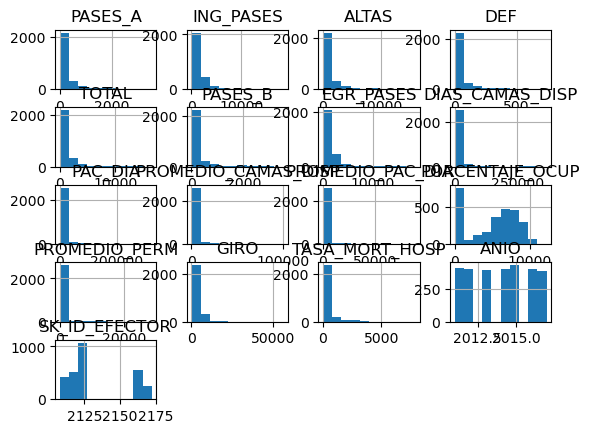

In [7]:
df.hist()

In [8]:
df.isnull()

,SERVICIO,ESPECIALIDADES,NOM_EFECTOR_BADATA,CODHOSP,TIPHOSP,PASES_A,ING_PASES,ALTAS,DEF,TOTAL,...,PAC_DIA,PROMEDIO_CAMAS_DISP,PROMEDIO_PAC_DIA,PORCENTAJE_OCUP,PROMEDIO_PERM,GIRO,TASA_MORT_HOSP,ANIO,SK_ID_EFECTOR,OBSERVACIONES
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2810,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2811,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2812,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


**Dado que la columna "Observaciones" no será de nuestro interés, no se considera necesario reemplazar o eliminar la misma, trabajaremos con:

*SERVICIO: Corresponde al ingreso del paciente en Hospital 
*ESPECIALIDADES:El subtipo de ingreso, donde ha sido derivado el paciente al ingreso 
*TOTAL: La sumatoria entres de los pacientes que fallecieron y los que fueron dados de alta 
*ALTAS:cantidad de pacientes dados de alta 
*DEF:cantidad de pacientes fallecidos 
*TASA_MORT_HOSP: Tasa de mortalidad del Hospital 
*ANIO: año de ingreso del paciente
*NOM_EFECTOR_BADATA: nombre del Hospital
*PAC_DIA: pacientes diarios
*PROMEDIO_CAMAS_DISP: promedio de camas disponibles
*PROMEDIO_PAC_DIA:promedio de pacientes diarios
**Para mejor visualización se ha agregado un código a cada Hospital (CODHOSP), y se los ha identificado por tipo de Hospital(TIPHOSP)

In [10]:
#Para realizar un análisis de los datos, en principio se trabajará sobre las defunciones y tasa de mortalidad


df[["SERVICIO","ESPECIALIDADES", "CODHOSP","TOTAL","TIPHOSP","ALTAS","DEF","TASA_MORT_HOSP","ANIO","NOM_EFECTOR_BADATA"]]

,SERVICIO,ESPECIALIDADES,CODHOSP,TOTAL,TIPHOSP,ALTAS,DEF,TASA_MORT_HOSP,ANIO,NOM_EFECTOR_BADATA
0,Cirugia,Urologia,HGNRG,319.0,INFANT,319.0,0.0,0.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
1,Cirugia,Subtotal Cirugia,HGNRG,4643.0,INFANT,4616.0,27.0,51.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
2,Urgencia,Terapia Intensiva,HGNRG,65.0,INFANT,3.0,62.0,1834.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
3,Urgencia,Subtotal Urgencia,HGNRG,65.0,INFANT,3.0,62.0,1834.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
4,Urgencia,Total Hospital,HGNRG,9757.0,INFANT,9633.0,124.0,127.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
...,...,...,...,...,...,...,...,...,...,...
2809,Cirugia,Subtotal Cirugia,HMOYANO,19.0,PSIQUIAT,16.0,3.0,3.0,2011,HOSPITAL DE SALUD MENTAL BRAULIO MOYANO
2810,Urgencia,Guardia Del Día,HGAJPEN,1363.0,GAGUDOS,1222.0,141.0,4.0,2012,HOSPITAL GENERAL DE AGUDOS J. A. PENNA
2811,Tocoginecologia,Subtotal Tocoginecologia,HGAVS,1842.0,GAGUDOS,1842.0,0.0,0.0,2012,HOSPITAL GENERAL DE AGUDOS D. VELEZ SARSFIELD
2812,Urgencia,Terapia Intermedia,HGAVS,0.0,GAGUDOS,0.0,0.0,0.0,2011,HOSPITAL GENERAL DE AGUDOS D. VELEZ SARSFIELD


Text(0, 0.5, 'Tasa Mortalidad')

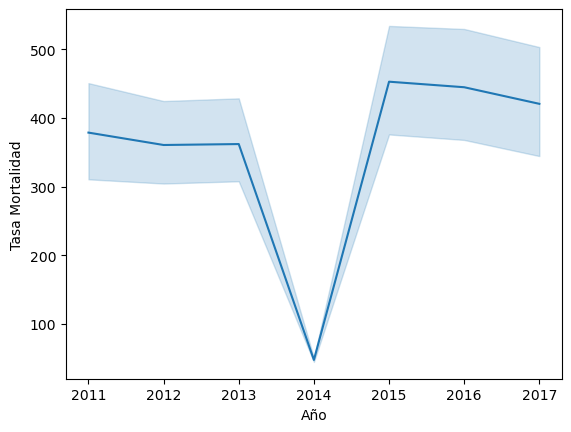

In [11]:
#Según la información suministrada veamos si ha variado la tasa de mortalidad anual


may_flights = df
sns.lineplot(data=df, x="ANIO", y="TASA_MORT_HOSP")
plt.xlabel('Año')
plt.ylabel('Tasa Mortalidad')

Text(0.5, 1.0, 'Histograma de Mortalidad')

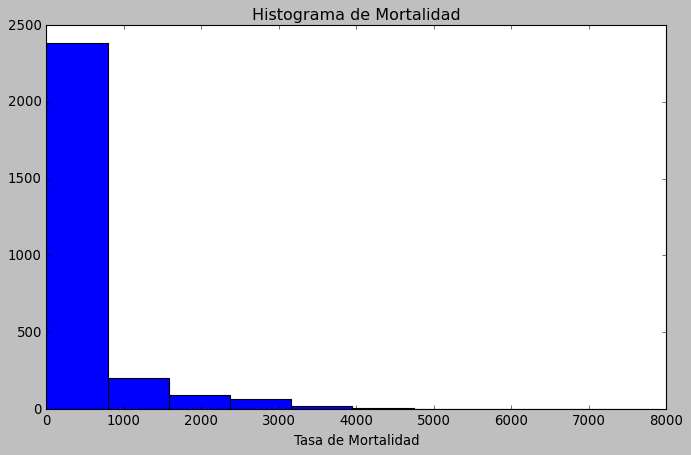

In [79]:

#Realizamos un histograma sobre la tasa de mortalidad

mpl.style.use('classic')
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= df.TASA_MORT_HOSP, bins=None, density=False, orientation='vertical')
ax.set_xlabel('Tasa de Mortalidad')
ax.set_title('Histograma de Mortalidad')

In [24]:
#Observamos con qué tipo de servicios trabajan los nosocomios

df.SERVICIO.value_counts()

Cirugia                                      813
Medicina                                     656
Urgencia                                     565
Pediatria                                    406
Tocoginecologia                              166
Cuidados Genereales - Area Indiferenciada     69
Cuidados Especiales                           56
Area Indiferenciada                           40
sticas de Salud - MSGC                        28
Internacion De Corta Estadia                  15
Name: SERVICIO, dtype: int64

Text(0, 0.5, 'SERVICIO')

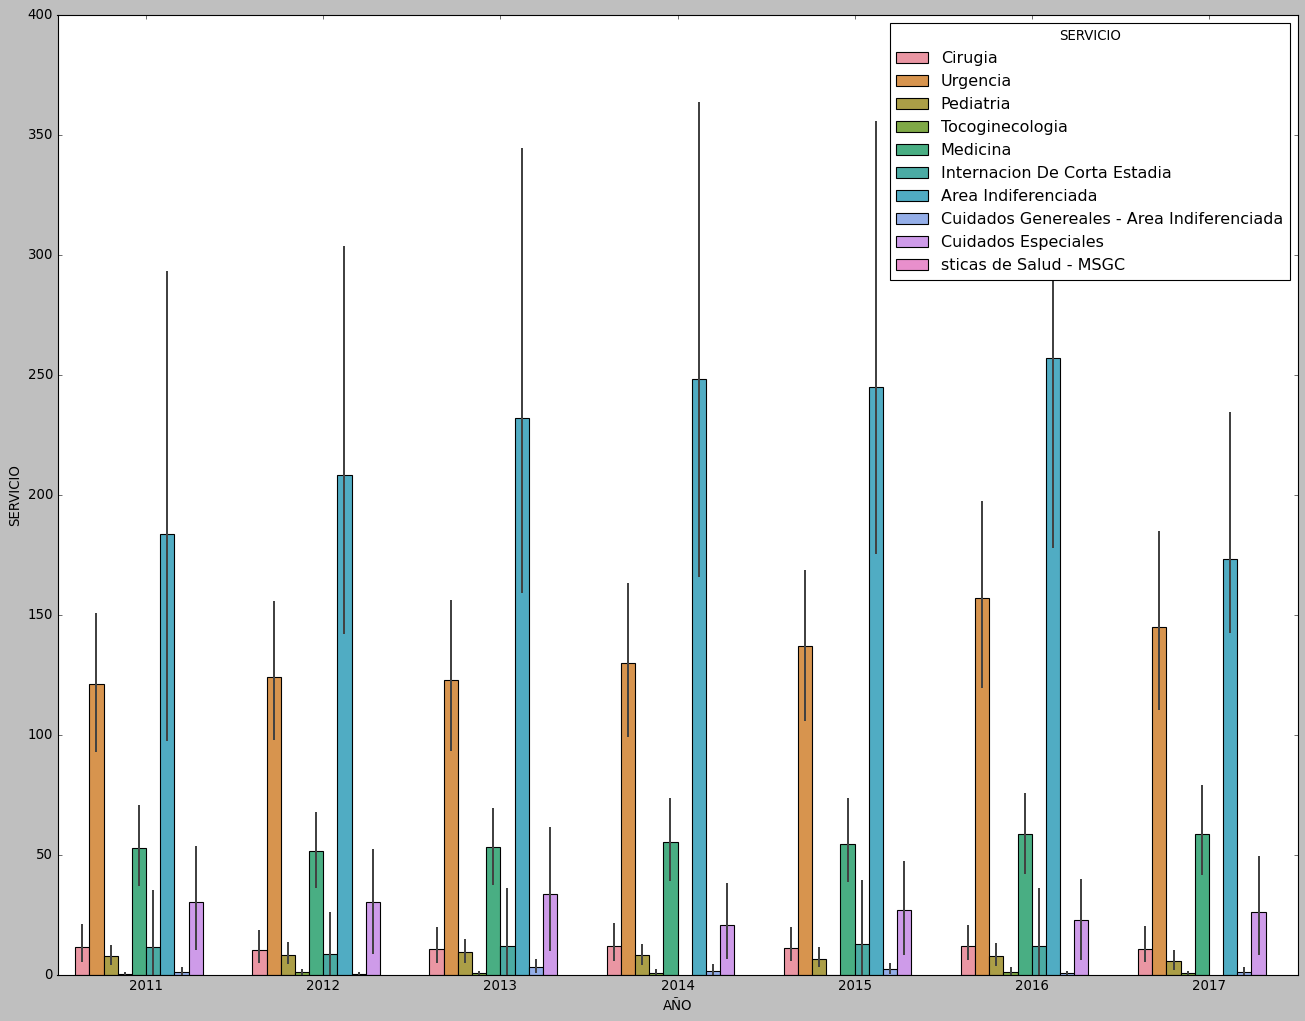

In [25]:

#Analizamos las defunciones por servicio anual

import seaborn as sns
plt.figure(figsize=(20,15))
sns.barplot(y='DEF',x='ANIO',hue='SERVICIO',data=df);
plt.xlabel('AÑO')
plt.ylabel('SERVICIO')


Text(0, 0.5, 'SERVICIO')

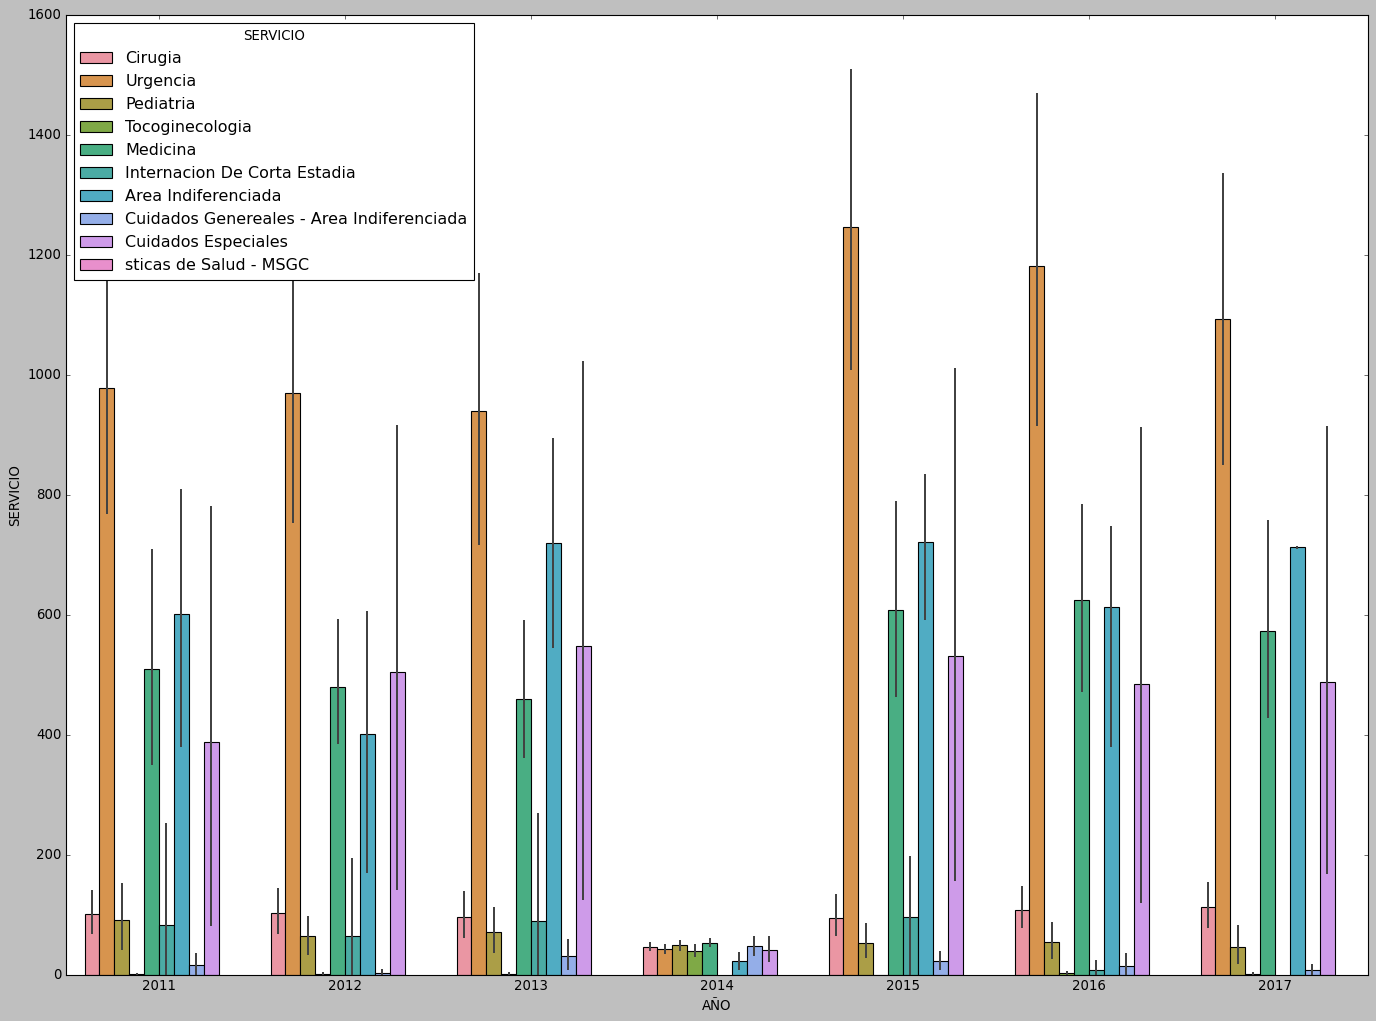

In [26]:
#Y la tasa de mortalidad por servicio anual


import seaborn as sns
plt.figure(figsize=(21,15))
sns.barplot(y='TASA_MORT_HOSP',x='ANIO',hue='SERVICIO',data=df);
plt.xlabel('AÑO')
plt.ylabel('SERVICIO')

In [74]:
#Tienen mayores ingresos CIRUGIA,MEDICINA y URGENCIA.
#Pero la tasa de mortalidad es alta en el servicio de MEDICINA y URGENCIA Y AREA INDIFERENCIADA.


df.groupby('SERVICIO')[['TASA_MORT_HOSP']].mean() 

#Urgencia	920.103387
#Area Indiferenciada	543.794872
#Medicina	472.478593


,TASA_MORT_HOSP
SERVICIO,
Area Indiferenciada,543.794872
Cirugia,95.442236
Cuidados Especiales,426.928571
Cuidados Genereales - Area Indiferenciada,20.840580
Internacion De Corta Estadia,68.666667
Medicina,472.478593
Pediatria,62.255583
Tocoginecologia,7.289157
Urgencia,920.103387


Text(0, 0.5, 'DEF. Y TASA MORT X SERVICIO')

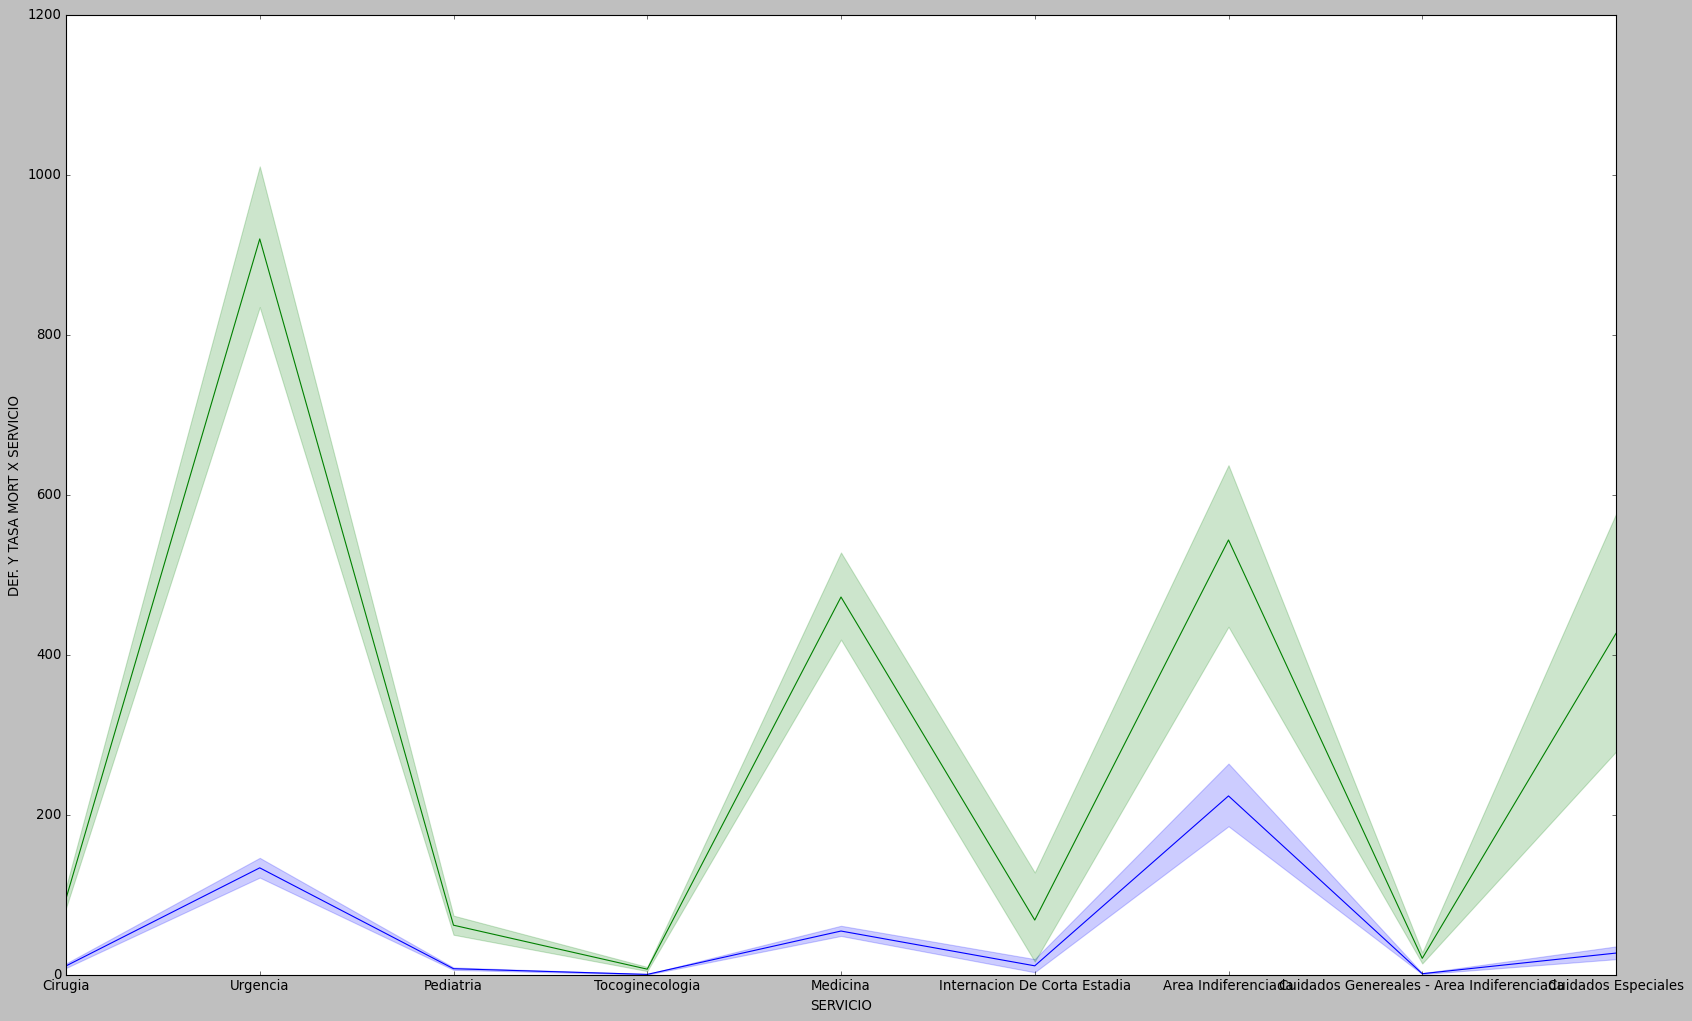

In [67]:
#Podemos visualizar juntas la tasa de mortalidad y las defunciones por Servicio

plt.figure(figsize=(25,15))
may_flights = df
sns.lineplot(data=df, x="SERVICIO", y="DEF")
plt.xlabel('SERVICIO')
plt.ylabel('DEF. Y TASA MORT X SERVICIO')

may_flights = df
sns.lineplot(data=df, x="SERVICIO", y="TASA_MORT_HOSP")
plt.xlabel('SERVICIO')
plt.ylabel('DEF. Y TASA MORT X SERVICIO')

Text(0, 0.5, 'Defunciones')

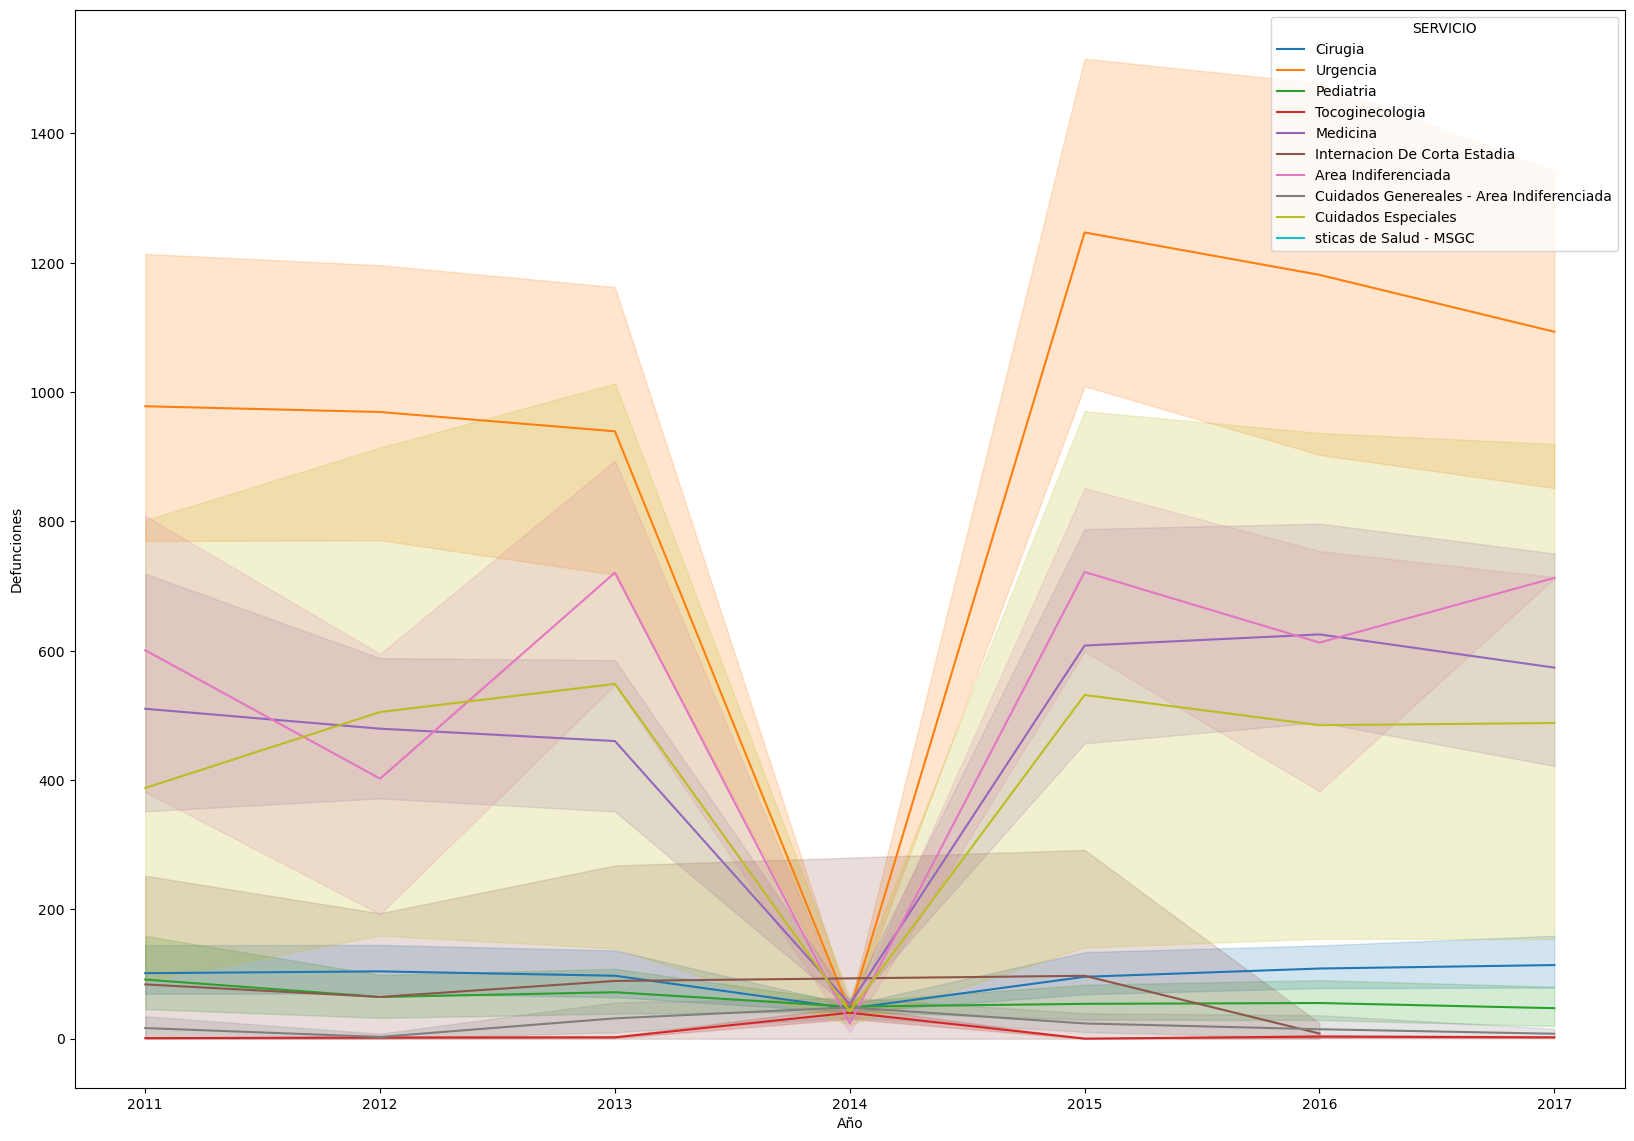

In [4]:
#Analizamos ahora la tasa de mortalidad anual según la categoría servicio


plt.figure(figsize=(20,14))
may_flights = df
sns.lineplot(y='TASA_MORT_HOSP',x='ANIO',hue='SERVICIO',data=df)
plt.xlabel('Año')
plt.ylabel('Defunciones')

C:\Users\Nancy\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


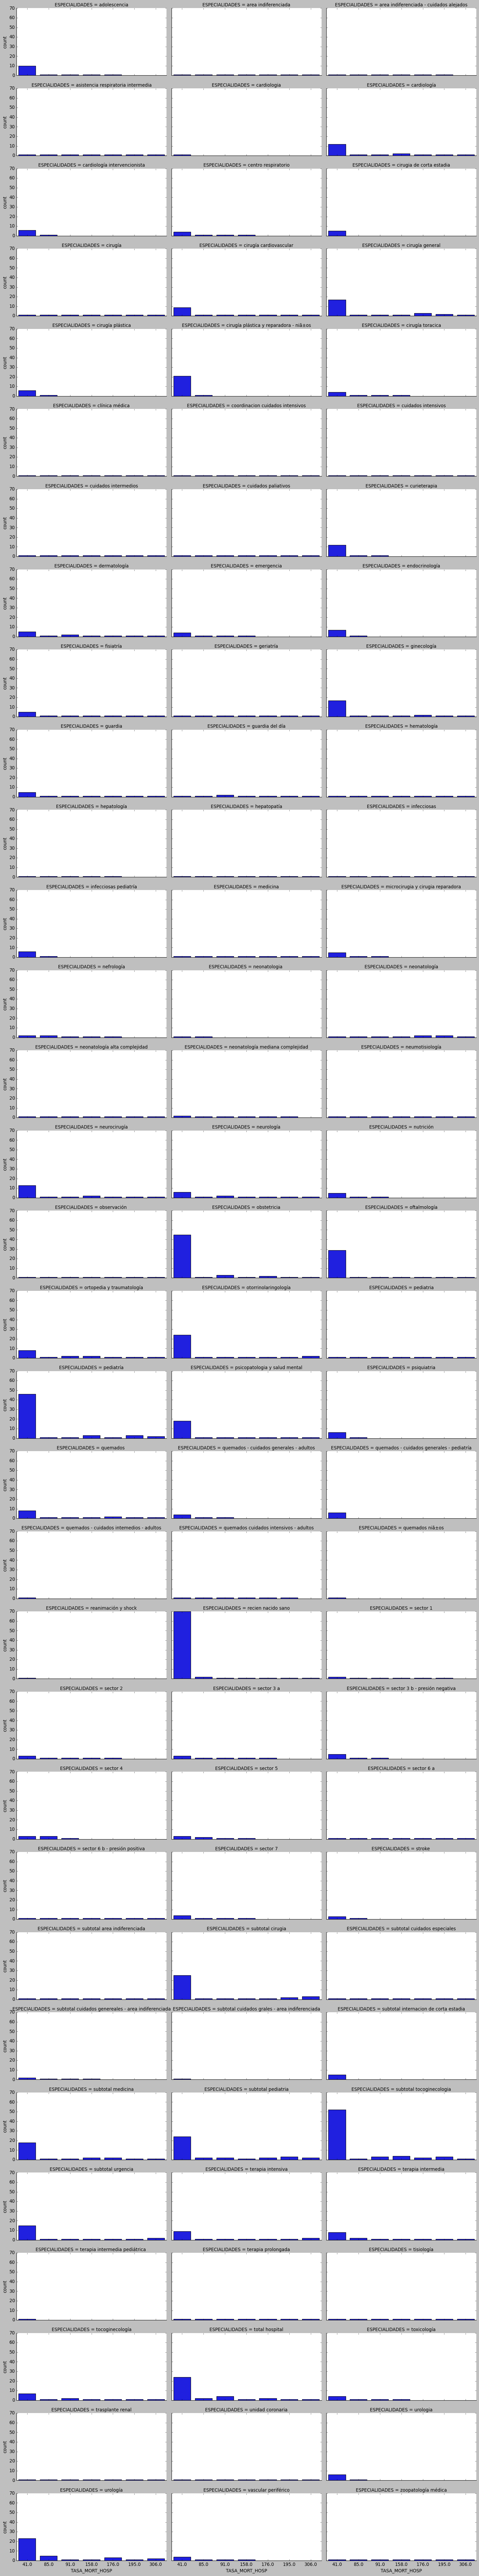

In [59]:
# Considerando que los servicios poseen especialidades es prudente enfocarnos en las mismas


df1 = pd.DataFrame({'count': df.groupby(['ESPECIALIDADES', 'TASA_MORT_HOSP']).size()})
df1 = df1.reset_index()
chart = sns.FacetGrid(df1, col='ESPECIALIDADES', margin_titles=True, col_wrap=3, aspect=2, row_order=df['ESPECIALIDADES'].unique)
chart.map(sns.barplot, 'TASA_MORT_HOSP', 'count',)

In [75]:



#Buscamos la información de altas, y defunciones con el total de ingresos anual

df.groupby('ANIO')[['TOTAL', 'ALTAS', 'DEF']].sum() 



,TOTAL,ALTAS,DEF
ANIO,,,
2011,545912.0,527455.0,18457.0
2012,540461.0,522557.0,17904.0
2013,532989.0,514584.0,18405.0
2014,514302.0,494847.0,19455.0
2015,505266.0,485559.0,19707.0
2016,491546.0,469721.0,21825.0
2017,456255.0,437133.0,19122.0


In [78]:
df.groupby('ANIO')[['TASA_MORT_HOSP']].mean() 


#Sin duda alguna, estamos en condiciones de informarle al Ministerio que hay un faltante de datos en el año 2014

,TASA_MORT_HOSP
ANIO,
2011,378.655172
2012,360.593985
2013,361.956962
2014,47.262087
2015,452.885287
2016,444.797980
2017,420.603175


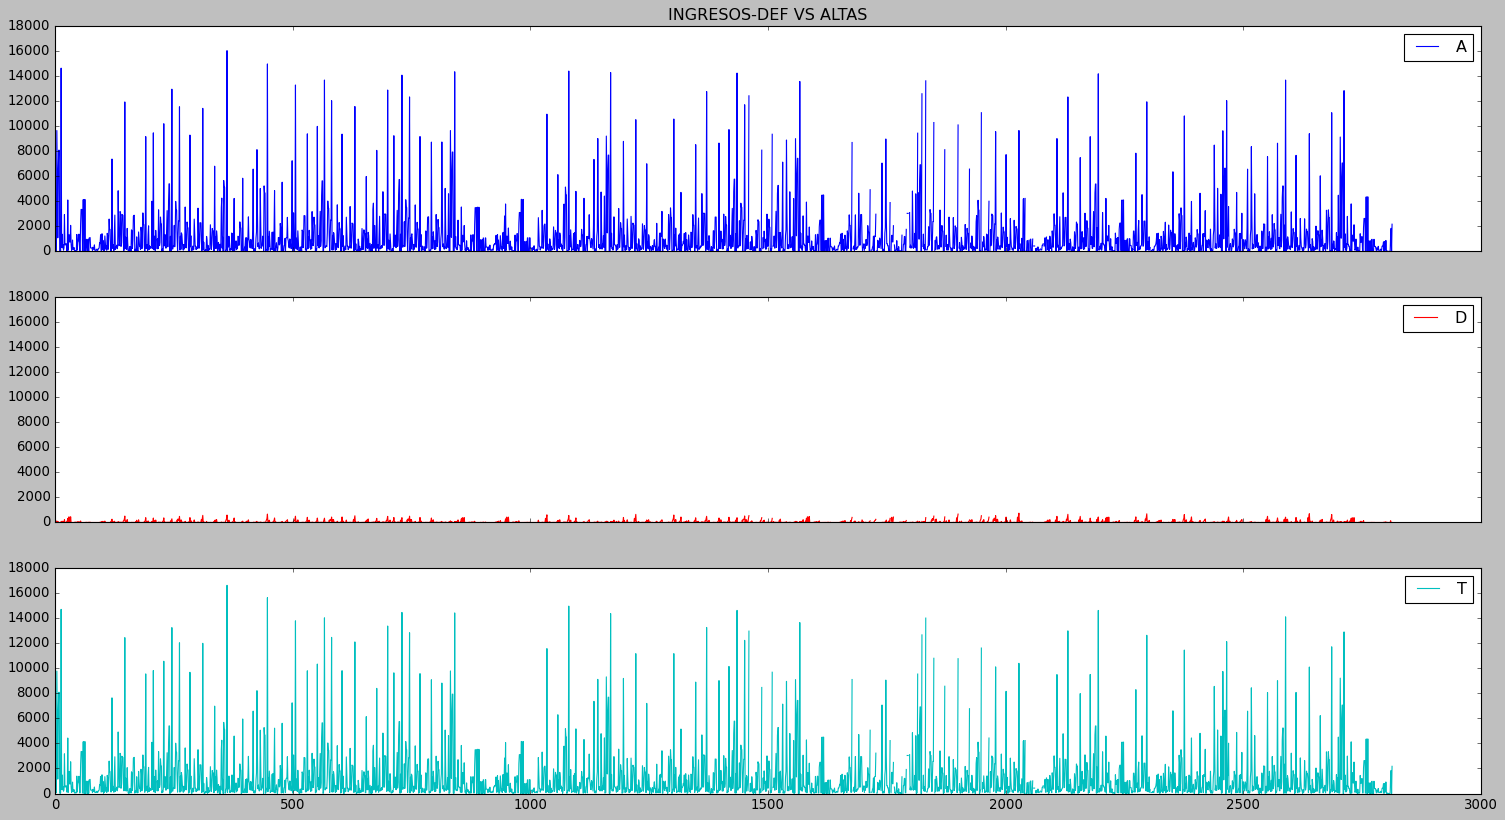

In [14]:
#Visualicemos comparativo de altas y defunciones sobre el total de ingresos



fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(23, 12), sharex=True, sharey=True)  
ax[0].plot(df.index, df['ALTAS'], label='ALTAS')
ax[1].plot(df.index, df['DEF'], label='DEFUNCIONES', color='C2')
ax[2].plot(df.index, df['TOTAL'], label='TOTAL INGRESOS', color='C3')
ax[0].set_title('INGRESOS-DEF VS ALTAS')
ax[0].legend('A')  
ax[1].legend('D')
ax[2].legend('T')  

In [15]:



#Para hacer un análisis más profundo, buscaremos la relación de defunciones por Hospitales. Cuáles son?


df.NOM_EFECTOR_BADATA.value_counts()


HOSPITAL GENERAL DE AGUDOS J. M. RAMOS MEJIA                189
HOSPITAL GENERAL DE AGUDOS DR. C. DURAND                    181
HOSPITAL GENERAL DE AGUDOS DONACION F. SANTOJANNI           172
HOSPITAL GENERAL DE AGUDOS B. RIVADAVIA                     165
HOSPITAL GENERAL DE AGUDOS DR C. ARGERICH                   162
HOSPITAL GENERAL DE AGUDOS DR. I. PIROVANO                  156
HOSPITAL GENERAL DE AGUDOS DR. J. A. FERNANDEZ              149
HOSPITAL GENERAL DE AGUDOS DR. T. ALVAREZ                   148
HOSPITAL GENERAL DE NIÑOS PEDRO DE ELIZALDE                 134
HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ                 127
HOSPITAL GENERAL DE AGUDOS D. VELEZ SARSFIELD               123
HOSPITAL GENERAL DE AGUDOS J. A. PENNA                      119
HOSPITAL GENERAL DE AGUDOS DR. E. TORNU                     106
HOSPITAL DE INFECCIOSAS F. MUÑIZ                            101
HOSPITAL DE QUEMADOS DR. ARTURO UMBERTO ILLIA                99
HOSPITAL GENERAL DE AGUDOS P. PIÑERO    

Text(0, 0.5, 'HOSPITALES')

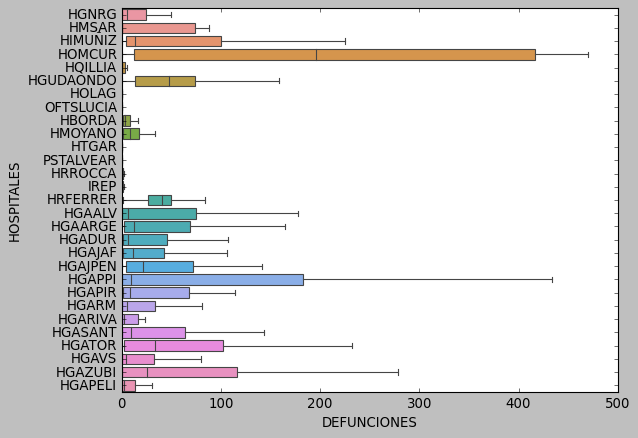

In [16]:
ax = sns.boxplot(x="DEF", y="CODHOSP", data=df,showfliers=False)
plt.xlabel('DEFUNCIONES')
plt.ylabel('HOSPITALES')



#Se observa una prevalencia de defunciones en: Hospital Municipal de Oncología Marie Curie (HOMCUR),
#Hospital General de Agudos P.Piñero (HGAPPI) Hospital y General de Agudos A. Zubizarreta (HGAZUBI)


Text(0, 0.5, 'TIPO HOSP')

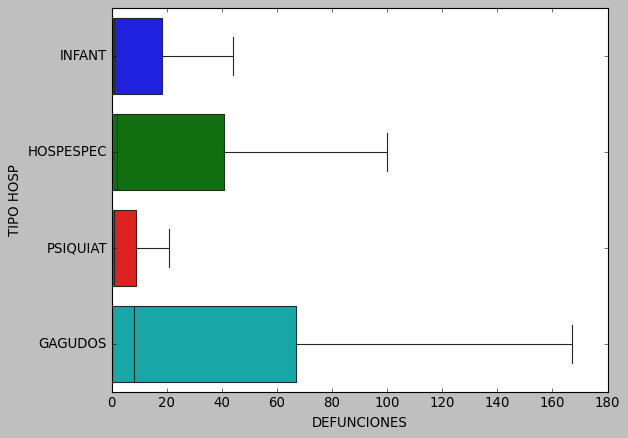

In [17]:
# Realizamos el mismo análisis por tipo de Hospital


ax = sns.boxplot(x="DEF", y="TIPHOSP", data=df,showfliers=False)
plt.xlabel('DEFUNCIONES')
plt.ylabel('TIPO HOSP')


#Destacan Hosp. de agudos y de especialidades (quemados, enf.infecciosas,oftalmología,gastoenterología,oncología,rehabilitación)

Text(0, 0.5, 'CODHOSP')

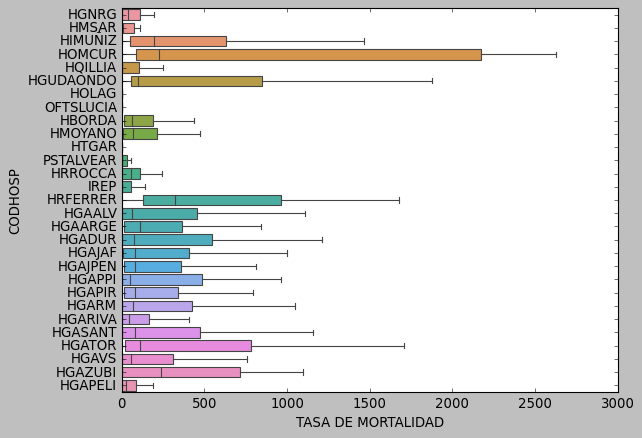

In [18]:


#Buscamos la tasa de mortalidad dado que la misma depende de los ingresos

#Las defunciones de gráficos anteriores pueden ser altas, pero quizás tener mayor cantidad de ingreso a internaciones


ax = sns.boxplot(x="TASA_MORT_HOSP", y="CODHOSP", data=df,showfliers=False)
plt.xlabel('TASA DE MORTALIDAD')
plt.ylabel('CODHOSP')

In [81]:
df.groupby('CODHOSP')[['TASA_MORT_HOSP']].mean()


#HOMCUR	992.642857 HIMUÑIZ	691.78 HGATOR	691.67619

#Los siguientes hospitales poseen mayor tasa de mortalidad:

#HOMCUR: HOSPITAL MUNICIPAL DE ONCOLOGIA MARIE CURIE
#HIMUÑIZ: HOSPITAL DE INFECCIOSAS F. MUÑIZ
#HGATOR: HOSPITAL GENERAL DE AGUDOS DR. E. TORNU



,TASA_MORT_HOSP
CODHOSP,
HBORDA,144.725490
HGAALV,338.027211
HGAARGE,339.677019
HGADUR,384.206704
HGAJAF,277.891892
HGAJPEN,402.144068
HGAPELI,191.563910
HGAPIR,371.764706
HGAPPI,299.593750


Text(0, 0.5, 'TIPO DE HOSP.')

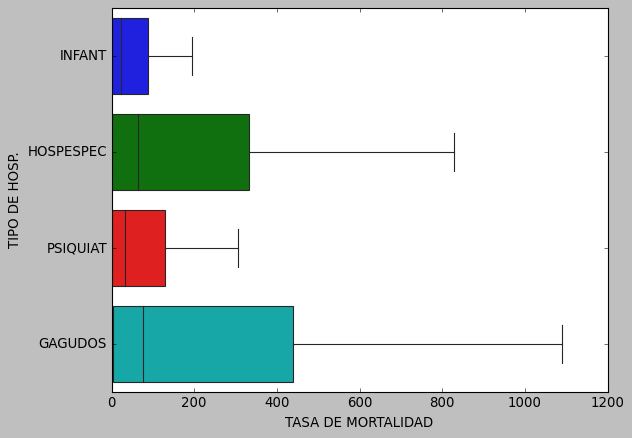

In [20]:
#Buscamos la tasa de mortalidad por tipo de hospital

ax = sns.boxplot(x="TASA_MORT_HOSP", y="TIPHOSP", data=df,showfliers=False)
plt.xlabel('TASA DE MORTALIDAD')
plt.ylabel('TIPO DE HOSP.')

In [70]:
df.groupby('TIPHOSP')[['TASA_MORT_HOSP']].mean()

#Los Hospitales de Especialidades y de Agudos poseen la mayor tasa de mortalidad

,TASA_MORT_HOSP
TIPHOSP,
GAGUDOS,385.392211
HOSPESPEC,422.762931
INFANT,159.761765
PSIQUIAT,162.000000


In [71]:
df.groupby('TIPHOSP')[['TOTAL','ALTAS','DEF']].sum()

,TOTAL,ALTAS,DEF
TIPHOSP,,,
GAGUDOS,2462813.0,2355331.0,107482.0
HOSPESPEC,406329.0,385188.0,21141.0
INFANT,667232.0,661715.0,5517.0
PSIQUIAT,50357.0,49622.0,735.0


In [82]:


# Sumamos a nuestros análisis los pacientes diarios, el promedio de pacientes y las camas disponibles



df[["SERVICIO", "PAC_DIA","PROMEDIO_CAMAS_DISP","PROMEDIO_PAC_DIA","ESPECIALIDADES",
    "CODHOSP","TOTAL","TIPHOSP","ALTAS","DEF","TASA_MORT_HOSP","ANIO","NOM_EFECTOR_BADATA"]]

,SERVICIO,PAC_DIA,PROMEDIO_CAMAS_DISP,PROMEDIO_PAC_DIA,ESPECIALIDADES,CODHOSP,TOTAL,TIPHOSP,ALTAS,DEF,TASA_MORT_HOSP,ANIO,NOM_EFECTOR_BADATA
0,Cirugia,1820.0,1292.0,499.0,urologia,HGNRG,319.0,INFANT,319.0,0.0,0.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
1,Cirugia,26327.0,13295.0,7213.0,subtotal cirugia,HGNRG,4643.0,INFANT,4616.0,27.0,51.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
2,Urgencia,5102.0,1668.0,1398.0,terapia intensiva,HGNRG,65.0,INFANT,3.0,62.0,1834.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
3,Urgencia,5102.0,1668.0,1398.0,subtotal urgencia,HGNRG,65.0,INFANT,3.0,62.0,1834.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
4,Urgencia,79283.0,31812.0,21721.0,total hospital,HGNRG,9757.0,INFANT,9633.0,124.0,127.0,2011,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,Cirugia,4947.0,32.0,13.0,subtotal cirugia,HMOYANO,19.0,PSIQUIAT,16.0,3.0,3.0,2011,HOSPITAL DE SALUD MENTAL BRAULIO MOYANO
2810,Urgencia,6252.0,17.0,17.0,guardia del día,HGAJPEN,1363.0,GAGUDOS,1222.0,141.0,4.0,2012,HOSPITAL GENERAL DE AGUDOS J. A. PENNA
2811,Tocoginecologia,6080.0,24.0,16.0,subtotal tocoginecologia,HGAVS,1842.0,GAGUDOS,1842.0,0.0,0.0,2012,HOSPITAL GENERAL DE AGUDOS D. VELEZ SARSFIELD
2812,Urgencia,6.0,0.0,0.0,terapia intermedia,HGAVS,0.0,GAGUDOS,0.0,0.0,0.0,2011,HOSPITAL GENERAL DE AGUDOS D. VELEZ SARSFIELD


In [46]:

df.groupby('CODHOSP')[['PROMEDIO_CAMAS_DISP', 'PROMEDIO_PAC_DIA']].mean()

,PROMEDIO_CAMAS_DISP,PROMEDIO_PAC_DIA
CODHOSP,,
HBORDA,24567.961538,21375.588235
HGAALV,2875.263514,1795.170068
HGAARGE,3126.395062,3019.565217
HGADUR,2493.834254,1923.011173
HGAJAF,3339.375839,3121.878378
HGAJPEN,4057.714286,3444.652542
HGAPELI,2342.208955,1744.436090
HGAPIR,3356.237179,2547.993548
HGAPPI,4195.628866,3269.250000


Text(0, 0.5, 'Promedio de camas por pacientes atendidos')

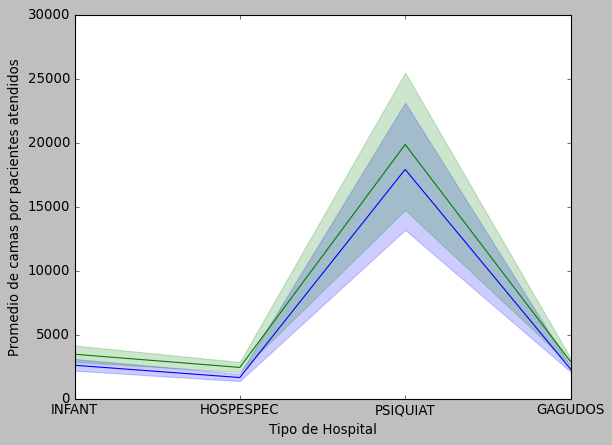

In [72]:

# Analizamos el promedio de camas por el promedio de pacientes atendidos

may_flights = df
sns.lineplot(data=df, x="TIPHOSP", y="PROMEDIO_PAC_DIA")
plt.xlabel('Tipo de Hospital')
plt.ylabel('Promedio de camas por pacientes atendidos')

may_flights = df
sns.lineplot(data=df, x="TIPHOSP", y="PROMEDIO_CAMAS_DISP")
plt.xlabel('Tipo de Hospital')
plt.ylabel('Promedio de camas por pacientes atendidos')


#Observamos que la cantidad de camas disponibles supera levemente la cantidad de pacientes.
#Importante tener en cuenta que no todas las consultas devienen en una internación.


Text(0, 0.5, 'Promedio de camas y Total intern')

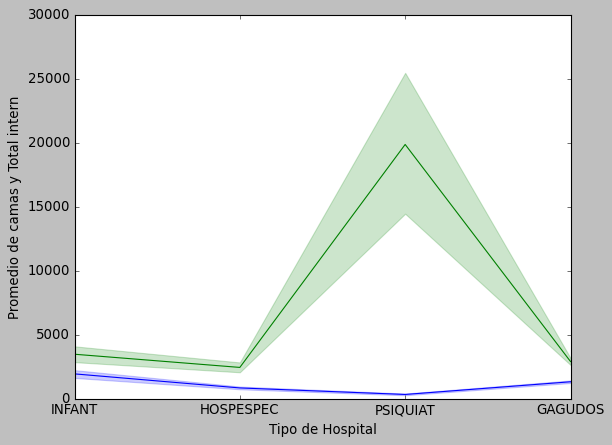

In [49]:

#Veamos ahora, según el total de internaciones, si se dispone de la cantidad de camas suficientes

may_flights = df
sns.lineplot(data=df, x="TIPHOSP", y="TOTAL")
plt.xlabel('Tipo de Hospital')
plt.ylabel('Promedio de camas y Total intern')

may_flights = df
sns.lineplot(data=df, x="TIPHOSP", y="PROMEDIO_CAMAS_DISP")
plt.xlabel('Tipo de Hospital')
plt.ylabel('Promedio de camas y Total intern')

#El siguiente gráfico nos demuestra que las internaciones son menores a las camas disponibles


## INTERPRETACIÓN Y CONCLUSIONES:

   **Con los datos suministrados se observa una baja de la tasa de mortalidad en el año 2014, sin embargo,
    esto se debe a un faltante de datos, o un error de cálculo en la tasa de mortalidad.
    
    
              TOTAL 	ALTAS	  DEF
ANIO			
2011	545912.0	527455.0	18457.0
2012	540461.0	522557.0	17904.0
2013	532989.0	514584.0	18405.0
2014	514302.0	494847.0	19455.0
2015	505266.0	485559.0	19707.0
2016	491546.0	469721.0	21825.0
2017	456255.0	437133.0	19122.0

**Dado que la tasa de mortalidad corresponde a la cantidad de defunciones, sobre la cantidad de pacientes x 1000
Es imposible observar un caída tan brusca en el año 2014.

**Tomando en cuenta los siguientes años hay un leve crecimiento en el 2015 que va disminuyendo hacia el 2017.

**Se registran más ingresos en CIRUGIA,MEDICINA y URGENCIA, pero los servicios con mayor tasa de mortalidad son los de AREA INDIFERENCIADA, URGENCIA y MEDICINA.

**Los Hospitales con mayor tasa de mortalidad son: HOSPITAL MUNICIPAL DE ONCOLOGIA MARIE CURIE, HOSPITAL DE INFECCIOSAS F. MUÑIZ,HOSPITAL GENERAL DE AGUDOS DR. E. TORNU.

**Concluímos que Los Hospitales de Especialidades y de Agudos poseen la mayor tasa de mortalidad

**En cuanto a la disponibilidad de camas, son muy superiores a la cantidad de internaciones, y sobre todo en los Hospitales de Salud mental. 



